# Declaración e Importación

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('DataSets/avocado.csv')

# Introducción

# Descripción del DataSet
Este data set contiene datos semanales de ventas de aguacates de tiendas nacionales <br>
Estos datos provienen directamente de las cajas registradoras de las tiendas.<br>
El costo de los aguacates es por unidad aunque muchos hayan sido vendidos en bolsas.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


El dataset cuenta con 14 variables o columnas. <br>
3 datos categóricos.<br>
9 datos continuos.<br>
1 dato contiene la fecha de observación.<br>
1 dato contiene el indice del dataset.<br>



Leamos un poco el dataset

In [34]:
data.head().style.background_gradient(cmap='Greens').hide_index()

/var/folders/wq/sb4m8f217db1t4z768qqyqxm0000gn/T/ipykernel_3138/928704783.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  data.head().style.background_gradient(cmap='Greens').hide_index()


Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.330000,64236.620000,1036.740000,54454.850000,48.160000,8696.870000,8603.620000,93.250000,0.000000,conventional,2015,Albany
1,2015-12-20,1.350000,54876.980000,674.280000,44638.810000,58.330000,9505.560000,9408.070000,97.490000,0.000000,conventional,2015,Albany
2,2015-12-13,0.930000,118220.220000,794.700000,109149.670000,130.500000,8145.350000,8042.210000,103.140000,0.000000,conventional,2015,Albany
3,2015-12-06,1.080000,78992.150000,1132.000000,71976.410000,72.580000,5811.160000,5677.400000,133.760000,0.000000,conventional,2015,Albany
4,2015-11-29,1.280000,51039.600000,941.480000,43838.390000,75.780000,6183.950000,5986.260000,197.690000,0.000000,conventional,2015,Albany


# Limpieza de datos
Verificamos que no existan valores null

In [7]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Como podemos ver no existe ningun valor null en nuestro dataset asi que no es necesario realizar una limpieza de datos.

# Exploratory Data Analisys
Resolveremos algunas preguntas haciendo uso de un EDA

<BarContainer object of 2 artists>

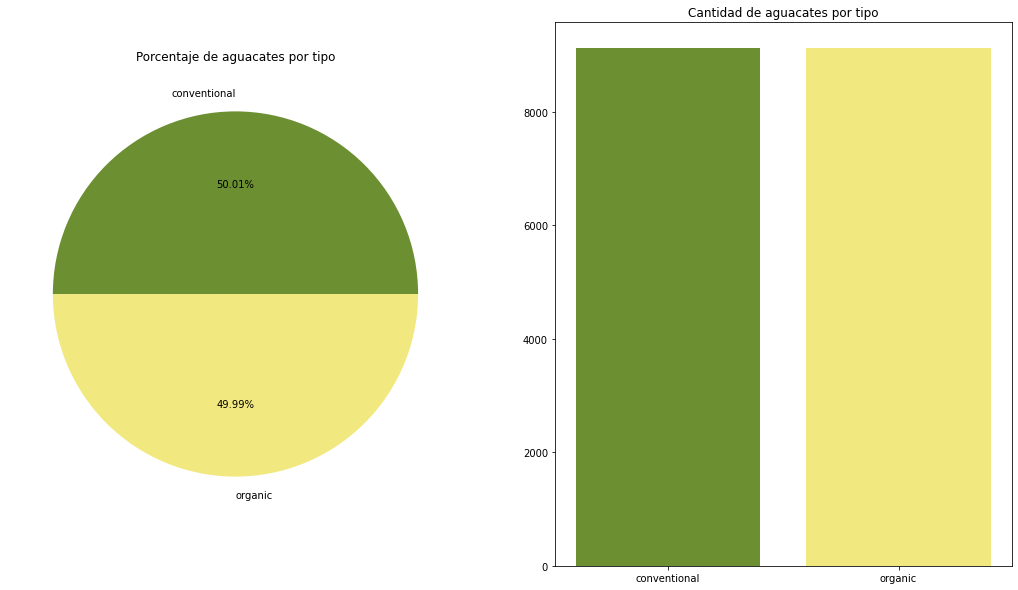

In [30]:
colores_aguacate= ['#356211', '#6C8F32', '#F2E880', '#C15C37', '#AA471F']
colors = colores_aguacate[1:3]

labels = data['type'].unique()
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.title('Porcentaje de aguacates por tipo')
plt.pie(data['type'].value_counts(), labels = labels, autopct = '%.2f%%', colors=colors)

plt.subplot(1,2,2)
plt.title('Cantidad de aguacates por tipo')
plt.bar(labels,data['type'].value_counts(),color= colors)


Podemos ver que la distribucion entre aguacates convencionales y organicos es igualitaria.

# Aguacates vendidos por año

<BarContainer object of 4 artists>

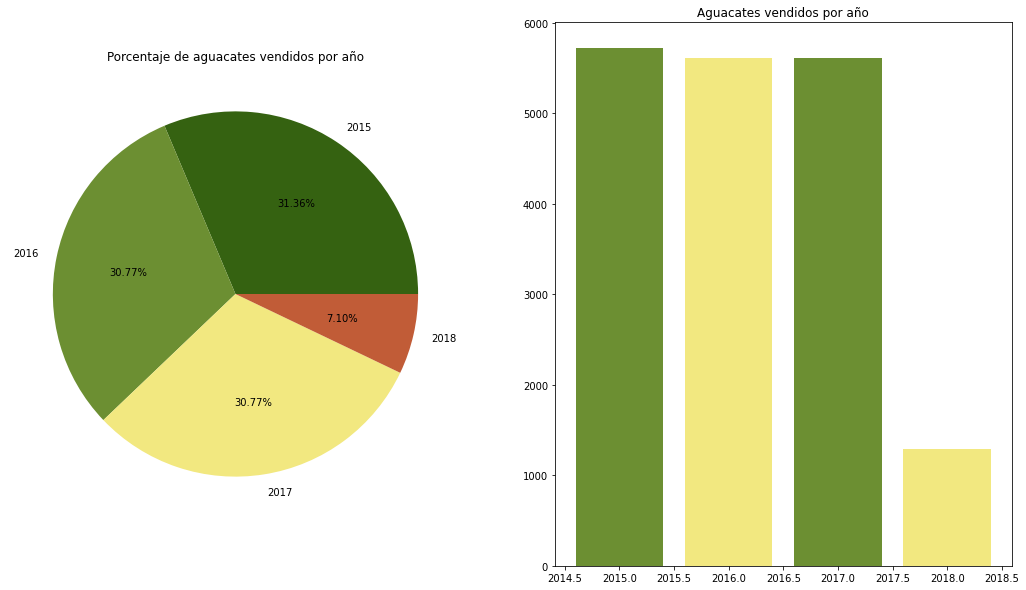

In [50]:
labels = data['year'].unique()
avocadoyear = data['year'].value_counts()

plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.title('Porcentaje de aguacates vendidos por año')
plt.pie(avocadoyear, labels = labels, autopct = '%.2f%%', colors=colores_aguacate)

plt.subplot(1,2,2)
plt.title('Aguacates vendidos por año')
plt.bar(labels,data['year'].value_counts(), color = colors)

Es el 2015 el año con más ventas de aguacates con un 31.36%<br>
El 2018 es el año con menos ventas con un 7.10%

# Top regiones con mas ventas de aguacates por tipo

In [66]:
convdata = data[data["type"]=='conventional']
convdata = convdata[["region","Total Volume"]]
convdata = convdata[convdata["region"]!='TotalUS']
convdata = convdata.groupby(by=['region'])['Total Volume'].sum()
convdata =convdata.to_frame().sort_values(by='Total Volume',ascending=False)
topconvdata = convdata.head(5)

orgdata = data[data["type"]=='organic']
orgdata = orgdata[["region","Total Volume"]]
orgdata = orgdata[orgdata["region"]!='TotalUS']
orgdata = orgdata.groupby(by=['region'])['Total Volume'].sum()
orgdata = orgdata.to_frame().sort_values(by='Total Volume',ascending=False)
toporgdata = orgdata.head(5)

labelsconv = topconvdata["region"].unique()
labelsorg = toporgdata["region"].unique()

plt.figure(figsize= (18,10))
plt.subplot(1,2,1)
plt.title('Top regiones con mas ventas de aguantes convencionales')
plt.bar(labelsconv,topconvdata['Total Volume'],color = colors)

plt.subplot(1,2,2)
plt.title('Top regiones con mas ventas de aguacates organicos')
plt.bar(labelsorg,toporgdata['Total Volume'])

KeyError: 'region'